In [1]:
def file_len(fname):
    minimo=9999999
    maximo=0
    with open(fname) as f:
        for i, l in enumerate(f):
            if len(l)<minimo:
                minimo=len(l)
            if len(l)>maximo:
                maximo=len(l)
    return [i + 1, minimo, maximo]


# Numero de lineas, longitud minima y maxima de bookings


In [2]:
file_len('/home/dsc/data/challenge/bookings.csv')

[10000011, 358, 436]

# Numero de lineas, longitud minima y maxima de searches

In [3]:
file_len('/home/dsc/data/challenge/searches.csv')

[20390199, 66, 529]

In [1]:
import pandas as pd

In [8]:
chunk_size=100000
bookings_chunk=pd.read_csv('/home/dsc/data/challenge/bookings.csv'
                     , sep='^', chunksize=chunk_size, low_memory=True, dtype=str)

In [9]:
new_bookings=pd.DataFrame()
for chunk in bookings_chunk:
    new_bookings=new_bookings.append(chunk)
    new_bookings.drop_duplicates(inplace=True)

    
new_bookings.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


In [14]:
len(new_bookings)

1000003

In [15]:
new_bookings.to_csv('/home/dsc/data/challenge/bookings_no_dupl.csv', sep='^')

In [16]:
arrs_pax=pd.read_csv('/home/dsc/data/challenge/bookings_no_dupl.csv'
                     , sep='^', usecols=['arr_port','pax'])

arrs_pax['arr_port']=arrs_pax['arr_port'].str.strip().str.upper()

# Los 10 aeropuertos con más pasajeros

In [17]:
arrs_pax.groupby('arr_port').sum('pax').sort_values(by='pax',ascending=False)[0:10]

,pax
arr_port,
LHR,8881.0
MCO,7093.0
LAX,7053.0
LAS,6963.0
JFK,6627.0
CDG,6449.0
BKK,5946.0
MIA,5815.0
SFO,5800.0


In [18]:
arrs_pax.groupby('arr_port').sum('pax').sort_values(by='pax',
            ascending=False)[0:10].to_csv('aeropuertos_mas_pasajeros.csv',sep='^')

In [19]:
del arrs_pax

# EJERCICIO 3

In [20]:
searches_chunk=pd.read_csv('/home/dsc/data/challenge/searches.csv'
                     , sep='^', chunksize=chunk_size, low_memory=True, dtype=str)

In [21]:
new_searches=pd.DataFrame()
for chunk in searches_chunk:
    new_searches=new_searches.append(chunk)
    new_searches.drop_duplicates(inplace=True)

    
new_searches.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [22]:
len(new_searches)

359004

In [23]:
new_searches.to_csv('/home/dsc/data/challenge/searches_no_dupl.csv', sep='^')

In [24]:
date_dest=pd.read_csv('/home/dsc/data/challenge/searches_no_dupl.csv',
                            sep='^', usecols=['Date','Destination'])

In [25]:
date_dest['Meses']=date_dest['Date'].str[0:7]

busq_Madrid=date_dest[date_dest['Destination']=='MAD']
busq_Malaga=date_dest[date_dest['Destination']=='AGP']
busq_Barcelona=date_dest[date_dest['Destination']=='BCN']



In [27]:
busq_Madrid=busq_Madrid[['Meses']].value_counts(sort=False).reset_index().rename(columns={0:'Madrid'})
busq_Malaga=busq_Malaga[['Meses']].value_counts(sort=False).reset_index().rename(columns={0:'Malaga'})
busq_Barcelona=busq_Barcelona[['Meses']].value_counts(sort=False).reset_index().rename(columns={0:'Barcelona'})

In [28]:
busq_joint=busq_Madrid.merge(right=busq_Malaga, how='outer',on='Meses')
busq_joint=busq_Barcelona.merge(right=busq_joint, how='outer',on='Meses')

In [29]:
busq_joint=busq_joint.set_index('Meses')

<AxesSubplot:xlabel='Meses', ylabel='Busquedas'>

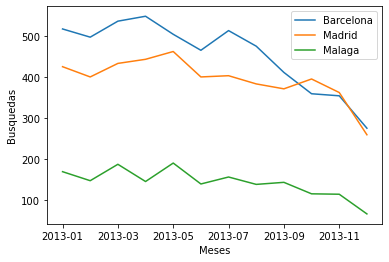

In [32]:
busq_joint.plot(ylabel='Busquedas')

# Ejercicio 4

In [7]:
searches=pd.read_csv('/home/dsc/data/challenge/searches_no_dupl.csv', sep='^')
bookings=pd.read_csv('/home/dsc/data/challenge/bookings_no_dupl.csv', sep='^',
                    usecols=lambda x: x.strip() in ['cre_date', 'act_date','dep_port','arr_port','brd_time','carrier','pax'])
bookings.rename(columns=lambda x: x.strip(), inplace=True)
searches.rename(columns=lambda x: x.strip(), inplace=True)

/home/dsc/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (41,42,43,45) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
pd.set_option('display.max_columns',None)

Estas son las únicas búsquedas que voy a considerar cruzables (sólo ida, 1 segmento e ida y vuelta, 2 segmentos)
En todas las demás no está claro cómo cruzar (el campo Destination no está bien relleno y habría que comparar fechas para ver qué cambios entre segmentos son "escalas" y cuáles suponen un vuelo distinto).
Con esta restricción sólo quito 15000 búsquedas sobre 350000.

In [9]:
searches[((searches['RoundTrip']==1) & (searches['NbSegments']==2)) | ((searches['RoundTrip']==0) & (searches['NbSegments']==1))]

,Unnamed: 0,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1.0,2.0,TXL,AUH,2013-01-26,D2,NaN,AUH,TXL,2013-02-02,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0.0,1.0,ATH,MIL,2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1.0,2.0,ICT,SFO,2013-08-02,NaN,NaN,SFO,ICT,2013-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0.0,1.0,RNB,ARN,2013-01-02,DU,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1.0,2.0,OSL,MAD,2013-03-22,NaN,NaN,MAD,OSL,2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358996,358997,2013-12-25,23:28:00,FXX,8d2a1e767a6c0231e998716660848886,CA,YVR,YYZ,0.0,1.0,YVR,YYZ,2014-01-06,KM,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AC0FQ,0,0,0,7f367281bba91bd682d613522a67949a,0
358997,358998,2013-12-25,03:32:53,FFP,8837afb0e639c78916107ffa3bc40984,GB,DME,BKK,0.0,1.0,DME,BKK,2013-12-28,KM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,0
358999,1436000,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1.0,2.0,TXL,AUH,2013-01-26,D2,NaN,AUH,TXL,2013-02-02,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA,NaN,NaN,NaN
359001,1436002,2013-01-01,18:04:49,MPT,3561,US,ICT,SFO,1.0,2.0,ICT,SFO,2013-08-02,NaN,NaN,SFO,ICT,2013-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC


In [10]:
bookings

,act_date,cre_date,dep_port,arr_port,carrier,brd_time,pax
0,2013-03-05 00:00:00,2013-02-22 00:00:00,ZRH,LHR,VI,2013-03-07 08:50:00,-1.0
1,2013-03-26 00:00:00,2013-03-26 00:00:00,SAL,CLT,NV,2013-04-12 13:04:00,1.0
2,2013-03-26 00:00:00,2013-03-26 00:00:00,SAL,CLT,NV,2013-07-15 07:00:00,1.0
3,2013-03-26 00:00:00,2013-03-26 00:00:00,AKL,SVO,XK,2013-04-24 23:59:00,1.0
4,2013-03-26 00:00:00,2013-03-26 00:00:00,AKL,SVO,XK,2013-05-14 20:15:00,1.0
...,...,...,...,...,...,...,...
999998,2013-05-28 00:00:00,2013-05-28 00:00:00,TLS,ORY,KP,2013-06-04 10:50:00,1.0
999999,2013-05-28 00:00:00,2013-05-28 00:00:00,TLS,ORY,KP,2013-06-04 19:10:00,1.0
1000000,2013-03-26 00:00:00,2013-03-26,AKL,SVO,XK,2013-04-24 23:59:00,1.0
1000001,2013-03-25 00:00:00,60,JP,SG,2013-04-14 17:10:56,3,NaN


columnas que deben coincidir: <br>
searches.Date=bookings.cre_date<br>
searches.Seg1Departure=bookings.dep_port<br>
searches.Seg1Arrival=bookings.arr_port<br>
searches.Seg1Date=bookings.brd_time<br>
<br>
... y si hay dos segmentos debe haber 2 bookings: <br>
searches.Date=bookings.cre_date<br>
searches.Seg2Departure=bookings.dep_port<br>
searches.Seg2Arrival=bookings.arr_port<br>
searches.Seg2Date=bookings.brd_time<br>
<br>
Además debemos quitar todos los bookings que no tengan un número positivo en pax (pueden ser cancelaciones o errores)<br>

In [11]:
searches['Seg1Departure']=searches['Seg1Departure'].str.strip().str.upper()
searches['Seg1Arrival']=searches['Seg1Arrival'].str.strip().str.upper()
searches['Seg1Carrier']=searches['Seg1Carrier'].str.strip().str.upper()
searches['Seg2Departure']=searches['Seg2Departure'].str.strip().str.upper()
searches['Seg2Arrival']=searches['Seg2Arrival'].str.strip().str.upper()
searches['Seg2Carrier']=searches['Seg2Carrier'].str.strip().str.upper()

bookings.drop_duplicates(inplace=True)
bookings['carrier']=bookings['carrier'].str.strip().str.upper()
bookings['dep_port']=bookings['dep_port'].str.strip().str.upper()
bookings['arr_port']=bookings['arr_port'].str.strip().str.upper()
bookings['cre_date']=bookings['cre_date'].str[0:10]
bookings['act_date']=bookings['act_date'].str[0:10]
bookings['brd_time']=bookings['brd_time'].str[0:10]

bookings=bookings[bookings['pax']>0]

bookings['Booked']=1

<ipython-input-11-0d17a05c9901>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bookings['Booked']=1


In [12]:
bookings

,act_date,cre_date,dep_port,arr_port,carrier,brd_time,pax,Booked
1,2013-03-26,2013-03-26,SAL,CLT,NV,2013-04-12,1.0,1
2,2013-03-26,2013-03-26,SAL,CLT,NV,2013-07-15,1.0,1
3,2013-03-26,2013-03-26,AKL,SVO,XK,2013-04-24,1.0,1
4,2013-03-26,2013-03-26,AKL,SVO,XK,2013-05-14,1.0,1
5,2013-03-20,2013-03-20,DEN,LGA,FK,2013-04-07,1.0,1
...,...,...,...,...,...,...,...,...
999997,2013-05-28,2013-05-28,AUS,RDU,KK,2013-07-12,1.0,1
999998,2013-05-28,2013-05-28,TLS,ORY,KP,2013-06-04,1.0,1
999999,2013-05-28,2013-05-28,TLS,ORY,KP,2013-06-04,1.0,1
1000000,2013-03-26,2013-03-26,AKL,SVO,XK,2013-04-24,1.0,1


In [13]:
searches_match1=searches.merge(right=bookings, how='inner',
                              left_on=('Seg1Departure','Seg1Arrival','Date','Seg1Date'),
                              right_on=('dep_port','arr_port','cre_date','brd_time'))[['Unnamed: 0','Booked']]
searches_match2=searches.merge(right=bookings, how='inner',
                              left_on=('Seg2Departure','Seg2Arrival','Date','Seg2Date'),
                              right_on=('dep_port','arr_port','act_date','brd_time'))[['Unnamed: 0','Booked']]

In [14]:
searches_match1=searches_match1.drop_duplicates().rename(columns={'Booked':'Booked_1'})
searches_match2=searches_match2.drop_duplicates().rename(columns={'Booked':'Booked_2'})

In [15]:
len(searches_match1)

434

In [16]:
len(searches_match2)

192

In [17]:
searches_booked=searches.copy()
searches_booked['Booked']=0
searches_booked=searches_booked.merge(right=searches_match1, how='left', on='Unnamed: 0')
searches_booked=searches_booked.merge(right=searches_match2, how='left', on='Unnamed: 0')

In [18]:
searches_booked

,Unnamed: 0,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice,Booked,Booked_1,Booked_2
0,0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1.0,2.0,TXL,AUH,2013-01-26,D2,NaN,AUH,TXL,2013-02-02,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA,0,NaN,NaN
1,1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0.0,1.0,ATH,MIL,2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV,0,NaN,NaN
2,2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1.0,2.0,ICT,SFO,2013-08-02,NaN,NaN,SFO,ICT,2013-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC,0,NaN,NaN
3,3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0.0,1.0,RNB,ARN,2013-01-02,DU,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO,0,NaN,NaN
4,4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1.0,2.0,OSL,MAD,2013-03-22,NaN,NaN,MAD,OSL,2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358999,1436000,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1.0,2.0,TXL,AUH,2013-01-26,D2,NaN,AUH,TXL,2013-02-02,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA,NaN,NaN,NaN,0,NaN,NaN
359000,1436001,"2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5c...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
359001,1436002,2013-01-01,18:04:49,MPT,3561,US,ICT,SFO,1.0,2.0,ICT,SFO,2013-08-02,NaN,NaN,SFO,ICT,2013-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC,0,NaN,NaN
359002,1436009,2013-01-01,19:57:57,MPT,28d7a8c95e4db88589d3d35b66920e78,DE,FRA,BGW,1.0,2.0,FRA,BGW,2013-02-26,NaN,NaN,BGW,FRA,2013-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BNJ,NaN,NaN,0,NaN,NaN


In [19]:
searches_booked.loc[(searches_booked['RoundTrip']==0) 
                & (searches_booked['NbSegments']==1) & (searches_booked['Booked_1']==1),
                   'Booked']=1
searches_booked.loc[(searches_booked['RoundTrip']==1) 
                & (searches_booked['NbSegments']==2) & (searches_booked['Booked_1']==1)
                & (searches_booked['Booked_2']==1),
                    'Booked']=1

In [20]:
searches_booked=searches_booked.drop(['Booked_1', 'Booked_2'], axis=1)

In [21]:
searches_booked

,Unnamed: 0,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice,Booked
0,0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1.0,2.0,TXL,AUH,2013-01-26,D2,NaN,AUH,TXL,2013-02-02,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA,0
1,1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0.0,1.0,ATH,MIL,2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV,0
2,2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1.0,2.0,ICT,SFO,2013-08-02,NaN,NaN,SFO,ICT,2013-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC,0
3,3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0.0,1.0,RNB,ARN,2013-01-02,DU,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO,0
4,4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1.0,2.0,OSL,MAD,2013-03-22,NaN,NaN,MAD,OSL,2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358999,1436000,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1.0,2.0,TXL,AUH,2013-01-26,D2,NaN,AUH,TXL,2013-02-02,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA,NaN,NaN,NaN,0
359000,1436001,"2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5c...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
359001,1436002,2013-01-01,18:04:49,MPT,3561,US,ICT,SFO,1.0,2.0,ICT,SFO,2013-08-02,NaN,NaN,SFO,ICT,2013-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC,0
359002,1436009,2013-01-01,19:57:57,MPT,28d7a8c95e4db88589d3d35b66920e78,DE,FRA,BGW,1.0,2.0,FRA,BGW,2013-02-26,NaN,NaN,BGW,FRA,2013-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BNJ,NaN,NaN,0


In [22]:
searches_booked[searches_booked['Booked']==1]

,Unnamed: 0,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice,Booked
432,432,2013-01-01,12:55:53,FCP,3565e31495ecfd46fa018339d20382b1,SA,RUH,JED,0.0,1.0,RUH,JED,2013-01-14,KP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,JED,1
741,741,2013-01-01,17:23:48,CCP,3565e31495ecfd46fa018339d20382b1,SA,JED,RUH,0.0,1.0,JED,RUH,2013-01-04,KP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,JED,1
923,923,2013-01-01,19:09:26,MPT,cf818ddafad144a83967003057e64033,IN,DEL,BOM,0.0,1.0,DEL,BOM,2013-01-02,D6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BOM,1
972,972,2013-01-01,06:15:14,FCP,3565e31495ecfd46fa018339d20382b1,SA,JED,RUH,0.0,1.0,JED,RUH,2013-01-04,KP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,JED,1
1222,1222,2013-01-02,17:33:58,MPT,440642a9bdaeb6287f826cefd73255e8,US,LAX,SJD,0.0,1.0,LAX,SJD,2013-01-09,P4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,HPN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342307,342308,2013-12-09,00:44:58,CCP,3565e31495ecfd46fa018339d20382b1,SA,RUH,JED,0.0,1.0,RUH,JED,2013-12-12,KK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,0,1
342834,342835,2013-12-09,03:50:47,CCP,3565e31495ecfd46fa018339d20382b1,SA,RUH,JED,0.0,1.0,RUH,JED,2013-12-12,KK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,0,1
346785,346786,2013-12-13,20:23:23,MPC,81286de2d269f83a92b8c3ca94d768c0,CO,BOG,MDE,0.0,1.0,BOG,MDE,2013-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,0,1
347531,347532,2013-12-14,07:33:26,MPT,8b4fa4e121637f583bfa86ef0fa26c9e,US,KWI,MNL,0.0,1.0,KWI,MNL,2013-12-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,0,1
